In [213]:
import numpy as np
import matplotlib.pyplot as plt

def pgm_viewer(x):
    image = open(x,'rb')
    header1 = image.readline()
    header2 = image.readline()
    header3 = image.readline()
    header4 = image.readline()
    pixel_data = image.read() #pixel data
    pgmHeader = header1  + header2  + header3  + header4
    header3 = header3.decode() #byte to string
    header3 = header3.split(" ") # Splitting height and width values in str
    column = int(header3[0])
    row = int(header3[1])
    
    data = list(pixel_data) # Converting bytearray to list to manipulate data
    data = np.array(data)
    imag = np.reshape(data,(row,column))
    #y = bytearray(pixel_data_list) # Converting back to bytearray
    plt.figure()
    plt.imshow(imag, cmap="gray",vmax=255,vmin=0)
    plt.colorbar()

In [214]:
def histogram_equalize(x):
    image = open(x,'rb')
    header1 = image.readline()
    header2 = image.readline()
    header3 = image.readline()
    header4 = image.readline()
    pixel_data = image.read() #pixel data
    pgmHeader = header1  + header2  + header3  + header4
    header3 = header3.decode() #byte to string
    header3 = header3.split(" ") # Splitting height and width values in str
    column = int(header3[0])
    row = int(header3[1])
    
    data = list(pixel_data) # Converting bytearray to list to manipulate data
    data = np.array(data)
    imag = np.reshape(data,(row,column))
    
    #flatten image array and calculate histogram via binning
    histogram_array = np.bincount(data, minlength=0)
    histogram_array.resize(256)
    
    #normalize
    num_pixels = np.sum(histogram_array)
    histogram_array = histogram_array/num_pixels
    
    # plot normalized histogram array
    plt.subplot(3,1,1)
    plt.plot(range(0,256),histogram_array) 
    plt.title("Normalized Histogram Of The Image")
    plt.show()

    #normalized cumulative histogram
    chistogram_array = np.cumsum(histogram_array)

    #plot normalized cumulative distribution s=T(r)
    plt.subplot(3,1,2)
    plt.plot(range(0,256),chistogram_array)
    plt.xlabel("r")
    plt.ylabel("s")
    plt.title("s=T(r) Cumulative Distribution")
    plt.show()

    #pixel mapping lookup table
    transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

    # flatten image array into 1D list
    img_list = list(transform_map.flatten())

    # transform pixel values to equalize
    eq_img_list = [transform_map[p] for p in data]
    equalized = np.bincount(eq_img_list, minlength=0)
    num_pixels = np.sum(equalized)
    equalized = equalized/num_pixels
    
    #plot equalized array
    plt.subplot(3,1,3)
    plt.plot(range(0,256),equalized) 
    plt.title("Equalized Histogram")
    plt.show()

    # reshape and write back into img_array
    eq_img_array = np.reshape(eq_img_list,(row,column))
   
    plt.figure()
    plt.imshow(eq_img_array, cmap="gray", vmax=255, vmin=0)
    plt.title("Equalized Image")
    plt.colorbar()

Text(0.5, 1.0, 'Original Image')

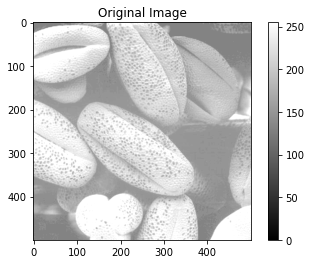

In [215]:
# TASK 3.20
pgm_viewer('Fig0320(1)(top_left).pgm')
plt.title("Original Image")

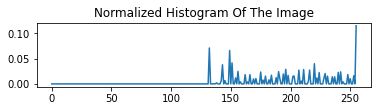

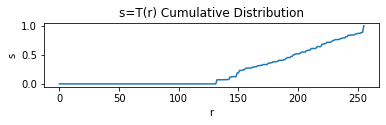

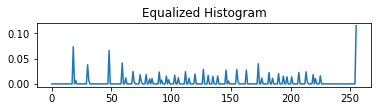

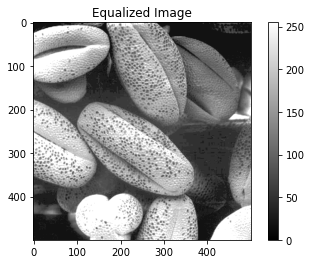

In [216]:
#TASK 3.20
histogram_equalize('Fig0320(1)(top_left).pgm')

Text(0.5, 1.0, 'Original Image')

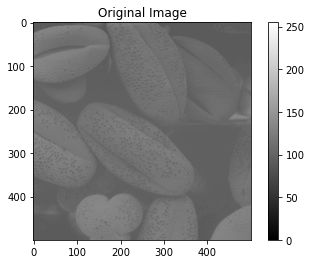

In [217]:
# TASK 3.20 (Cont.)
pgm_viewer('Fig0320(2)(2nd_from_top).pgm')
plt.title("Original Image")

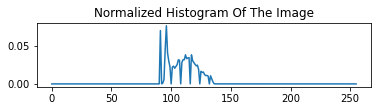

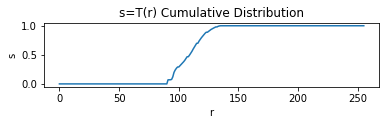

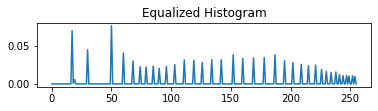

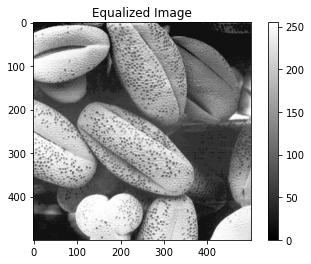

In [218]:
histogram_equalize('Fig0320(2)(2nd_from_top).pgm')

Text(0.5, 1.0, 'Original Image')

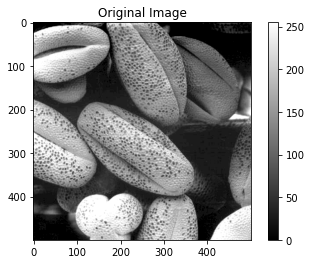

In [219]:
# TASK 3.20 (Cont.)
pgm_viewer('Fig0320(3)(third_from_top).pgm')
plt.title("Original Image")

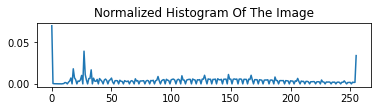

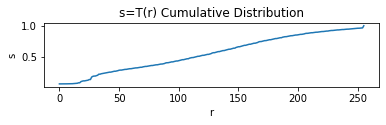

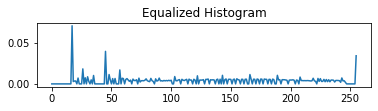

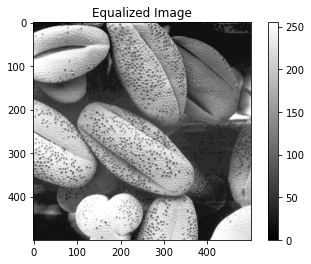

In [220]:
histogram_equalize('Fig0320(3)(third_from_top).pgm')

Text(0.5, 1.0, 'Original Image')

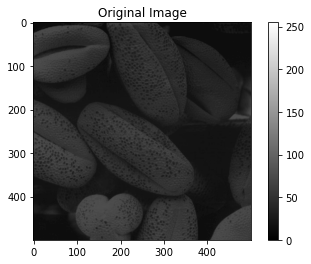

In [221]:
# TASK 3.20 (Cont.)
pgm_viewer('Fig0320(4)(bottom_left).pgm')
plt.title("Original Image")

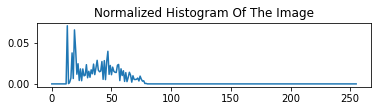

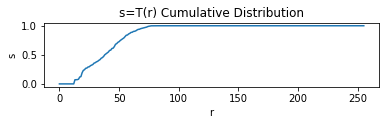

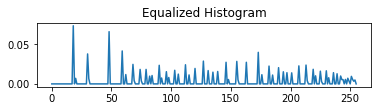

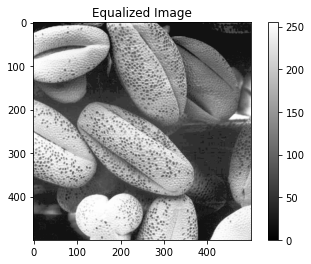

In [222]:
# TASK 3.20 (Cont.)
histogram_equalize('Fig0320(4)(bottom_left).pgm')

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sharpImage(x):
    image = open(x,'rb')
    header1 = image.readline()
    header2 = image.readline()
    header3 = image.readline()
    header4 = image.readline()
    pixel_data = image.read() #pixel data
    pgmHeader = header1  + header2  + header3  + header4
    header3 = header3.decode() #byte to string
    header3 = header3.split(" ") # Splitting height and width values in str
    column = int(header3[0])
    row = int(header3[1])
    
    data = list(pixel_data) # Converting bytearray to list to manipulate data
    data = np.array(data)
    data = data.reshape((row,column))
    w = np.zeros((row+2,column+2))
    
    for i in range(0,row):    # Creating image frame that consist of 0s
        for j in range(0,column):
            w[i+1][j+1] = data[i][j]
            
    laplacian1 = np.zeros((row,column))
    laplacian2 = np.zeros((row,column))
    mask1 = np.zeros((row,column))
    mask2 = np.zeros((row,column))
    sharpened_image1 = np.zeros((row,column))
    sharpened_image2 = np.zeros((row,column))
    weighted_average1 = np.array([[0,1,0],[1,-4,1],[0,1,0]])
    weighted_average2 = np.array([[1,1,1],[1,-8,1],[1,1,1]])
    
    for i in range(0,row):
        for j in range(0,column):
            laplacian1[i][j] = laplacian1[i][j] + (1/9) * np.sum(w[i:3+i,j:3+j] * weighted_average1)
            laplacian2[i][j] = laplacian2[i][j] + (1/9) * np.sum(w[i:3+i,j:3+j] * weighted_average2)
              
            mask1[i][j] = data[i][j] - laplacian1[i][j]
            mask2[i][j] = data[i][j] - laplacian2[i][j]
            
            sharpened_image1[i][j] = data[i][j] + mask1[i][j]
            sharpened_image2[i][j] = data[i][j] + mask2[i][j]
    
    plt.figure()
    plt.imshow(data, cmap="gray",vmax=255,vmin=0)
    plt.colorbar()  
    plt.xlabel("Original Image")
    
    plt.figure()
    plt.imshow(laplacian1, cmap="gray")
    plt.colorbar()
    plt.xlabel("Laplacian1")
    
    plt.figure()
    plt.imshow(sharpened_image1, cmap="gray")
    plt.colorbar()
    plt.xlabel("Sharpened Image with Laplacian 1 mask")
    
    plt.figure()
    plt.imshow(sharpened_image2, cmap="gray")
    plt.colorbar()    
    plt.xlabel("Sharpened Image with Laplacian 2 mask")

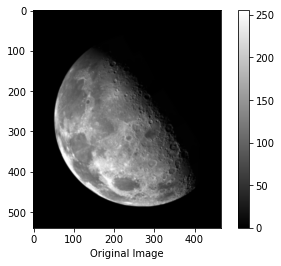

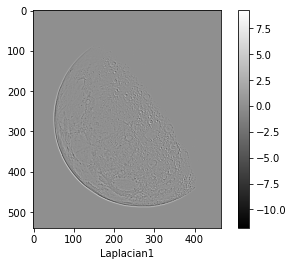

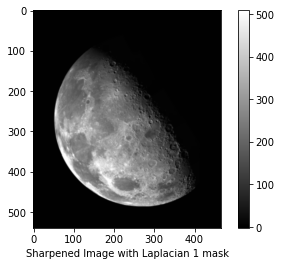

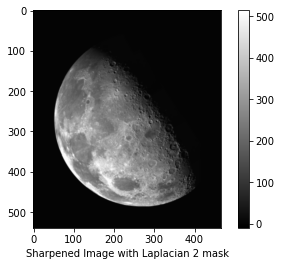

In [4]:
# TASK 3.38
sharpImage('Fig0338(a)(blurry_moon).pgm')

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def high_boost_filter(x,k):
    image = open(x,'rb')
    header1 = image.readline()
    header2 = image.readline()
    header3 = image.readline()
    header4 = image.readline()
    pixel_data = image.read() #pixel data
    pgmHeader = header1  + header2  + header3  + header4
    header3 = header3.decode() #byte to string
    header3 = header3.split(" ") # Splitting height and width values in str
    column = int(header3[0])
    row = int(header3[1])
    
    data = list(pixel_data) # Converting bytearray to list to manipulate data
    data = np.array(data)
    data = data.reshape((row,column))
    w = np.zeros((row+2,column+2))
    
    for i in range(0,row):    # Creating image frame that consist of 0s
        for j in range(0,column):
            w[i+1][j+1] = data[i][j]
            
    laplacian1 = np.zeros((row,column))
    laplacian2 = np.zeros((row,column))
    mask1 = np.zeros((row,column))
    mask2 = np.zeros((row,column))
    sharpened_image = np.zeros((row,column))
    high_boost = np.zeros((row,column))
    weighted_average1 = np.array([[0,1,0],[1,-4,1],[0,1,0]])
    weighted_average2 = np.array([[1,1,1],[1,-8,1],[1,1,1]])
    blurred_image = np.zeros((row,column))
    
    for i in range(0,row):
        for j in range(0,column):
            laplacian1[i][j] = laplacian1[i][j] + (1/9) * np.sum(w[i:3+i,j:3+j] * weighted_average1)
            laplacian2[i][j] = laplacian2[i][j] + (1/9) * np.sum(w[i:3+i,j:3+j] * weighted_average2)
            
            blurred_image[i][j] = (1/25) * int(np.mean(w[i:5+i,j:5+j]))  
            
            mask1[i][j] = data[i][j] - laplacian1[i][j]
            mask2[i][j] = data[i][j] - laplacian2[i][j]
            
            sharpened_image[i][j] = data[i][j] + mask1[i][j]
            high_boost[i][j] = data[i][j] + k*mask2[i][j]
    
    plt.figure()
    plt.imshow(data, cmap="gray",vmax=255,vmin=0)
    plt.colorbar()  
    plt.xlabel("Original Image")

    plt.figure()
    plt.imshow(blurred_image, cmap="gray")
    plt.colorbar()    
    plt.xlabel("Blurred Image Using 5x5 Gaussian Filter")
    
    plt.figure()
    plt.imshow(laplacian1, cmap="gray")
    plt.colorbar()
    plt.xlabel("Unsharp Mask")
    
    plt.figure()
    plt.imshow(sharpened_image, cmap="gray")
    plt.colorbar()    
    plt.xlabel("Result Of Using Unsharp Masking")
    
    plt.figure()
    plt.imshow(high_boost, cmap="gray")
    plt.colorbar()    
    plt.xlabel("Result Of Using Highboost Filtering (k=4.5)")    

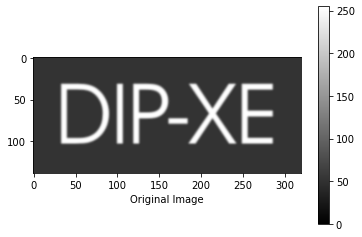

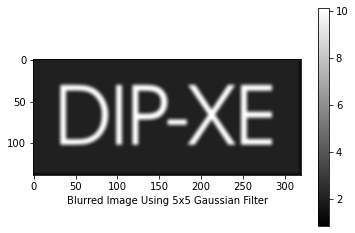

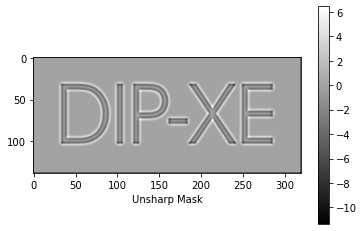

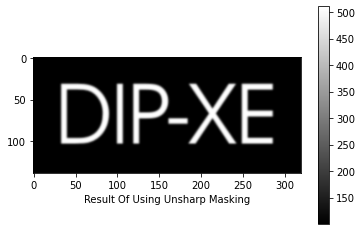

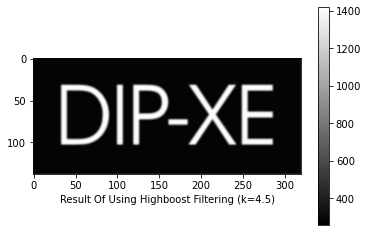

In [16]:
# TASK 3.40
high_boost_filter("Fig0340(a)(dipxe_text).pgm",4.5) # High boost filter with k=4.5